In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Load data
pre = pd.read_csv("https://raw.githubusercontent.com/Undran/Mongolia-AirPollution-CoalBan/refs/heads/main/data/openaq_pre2019.csv")
post = pd.read_csv("https://raw.githubusercontent.com/Undran/Mongolia-AirPollution-CoalBan/refs/heads/main/data/openaq_post2019.csv")

# Inspect basic info
print("Pre-2019 dataset info:")
print(pre.info())
print("\nPost-2019 dataset info:")
print(post.info())

Pre-2019 dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   location_id    1000 non-null   int64  
 1   location_name  1000 non-null   object 
 2   parameter      1000 non-null   object 
 3   value          1000 non-null   float64
 4   unit           1000 non-null   object 
 5   datetimeUtc    1000 non-null   object 
 6   datetimeLocal  1000 non-null   object 
 7   timezone       1000 non-null   object 
 8   latitude       1000 non-null   float64
 9   longitude      1000 non-null   float64
 10  country_iso    0 non-null      float64
 11  isMobile       0 non-null      float64
 12  isMonitor      0 non-null      float64
 13  owner_name     1000 non-null   object 
 14  provider       1000 non-null   object 
dtypes: float64(6), int64(1), object(8)
memory usage: 117.3+ KB
None

Post-2019 dataset info:
<class 'pandas.core.frame.Dat

In [27]:
# Summary statistics
# ====================
print("\nPre-2019 PM2.5 statistics:")
print(pre[pre["parameter"] == "pm25"]["value"].describe())

print("\nPost-2019 PM2.5 statistics:")
print(post[post["parameter"] == "pm25"]["value"].describe())


Pre-2019 PM2.5 statistics:
count    1000.000000
mean       20.832200
std       421.919389
min      -999.000000
25%        34.350000
50%        96.950000
75%       224.900000
max       964.600000
Name: value, dtype: float64

Post-2019 PM2.5 statistics:
count    1000.000000
mean      -88.123000
std       455.063044
min      -999.000000
25%         3.000000
50%        50.000000
75%       157.250000
max       752.000000
Name: value, dtype: float64


In [8]:
# Check missing values
print("\nMissing values in Pre-2019 dataset:")
print(pre.isnull().sum())
print("\nMissing values in Post-2019 dataset:")
print(post.isnull().sum())

# Cleaning
# Drop empty columns
pre = pre.drop(columns=["country_iso", "isMobile", "isMonitor"])
post = post.drop(columns=["country_iso", "isMobile", "isMonitor"])

# Ensure value is float
pre["value"] = pre["value"].astype(float)
post["value"] = post["value"].astype(float)

# Parse datetime
pre["datetimeUtc"] = pd.to_datetime(pre["datetimeUtc"])
post["datetimeUtc"] = pd.to_datetime(post["datetimeUtc"])



Missing values in Pre-2019 dataset:
location_id         0
location_name       0
parameter           0
value               0
unit                0
datetimeUtc         0
datetimeLocal       0
timezone            0
latitude            0
longitude           0
country_iso      1000
isMobile         1000
isMonitor        1000
owner_name          0
provider            0
dtype: int64

Missing values in Post-2019 dataset:
location_id         0
location_name       0
parameter           0
value               0
unit                0
datetimeUtc         0
datetimeLocal       0
timezone            0
latitude            0
longitude           0
country_iso      1000
isMobile         1000
isMonitor        1000
owner_name          0
provider            0
dtype: int64


In [11]:
# Filter for PM2.5 only (main concern in UB)
pre_pm25 = pre[pre["parameter"] == "pm25"].copy()
post_pm25 = post[post["parameter"] == "pm25"].copy()

# Remove invalid values (e.g., negative or extreme placeholders)
pre_pm25 = pre_pm25[(pre_pm25["value"] >= 0) & (pre_pm25["value"] < 1000)]
post_pm25 = post_pm25[(post_pm25["value"] >= 0) & (post_pm25["value"] < 1000)]

# Convert datetime
pre_pm25["datetimeUtc"] = pd.to_datetime(pre_pm25["datetimeUtc"])
post_pm25["datetimeUtc"] = pd.to_datetime(post_pm25["datetimeUtc"])

# Add a column to distinguish periods
pre_pm25["period"] = "Pre-2019"
post_pm25["period"] = "Post-2019"

# Combine datasets
df_pm25 = pd.concat([pre_pm25, post_pm25], ignore_index=True)

In [12]:
# --- Descriptive statistics ---
print("Pre-2019 mean PM2.5:", pre_pm25["value"].mean())
print("Post-2019 mean PM2.5:", post_pm25["value"].mean())

# Hypothesis test (two-sample t-test)
t_stat, p_val = stats.ttest_ind(pre_pm25["value"], post_pm25["value"], equal_var=False, nan_policy="omit")
print("T-test results: t =", t_stat, "p =", p_val)

Pre-2019 mean PM2.5: 171.87508610792193
Post-2019 mean PM2.5: 130.09290322580645
T-test results: t = 5.743784505785217 p = 1.1039820089848992e-08


/tmp/ipython-input-2329804658.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="period", y="value", data=df_pm25, palette="Set2")


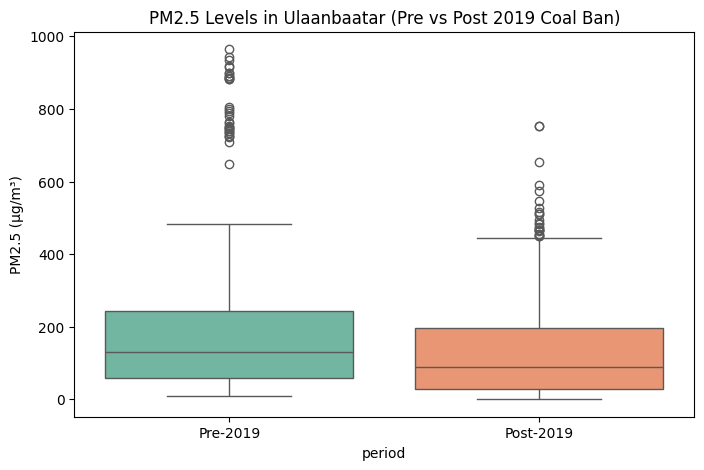

In [13]:
# 1. Boxplot comparison
plt.figure(figsize=(8,5))
sns.boxplot(x="period", y="value", data=df_pm25, palette="Set2")
plt.title("PM2.5 Levels in Ulaanbaatar (Pre vs Post 2019 Coal Ban)")
plt.ylabel("PM2.5 (µg/m³)")
plt.show()

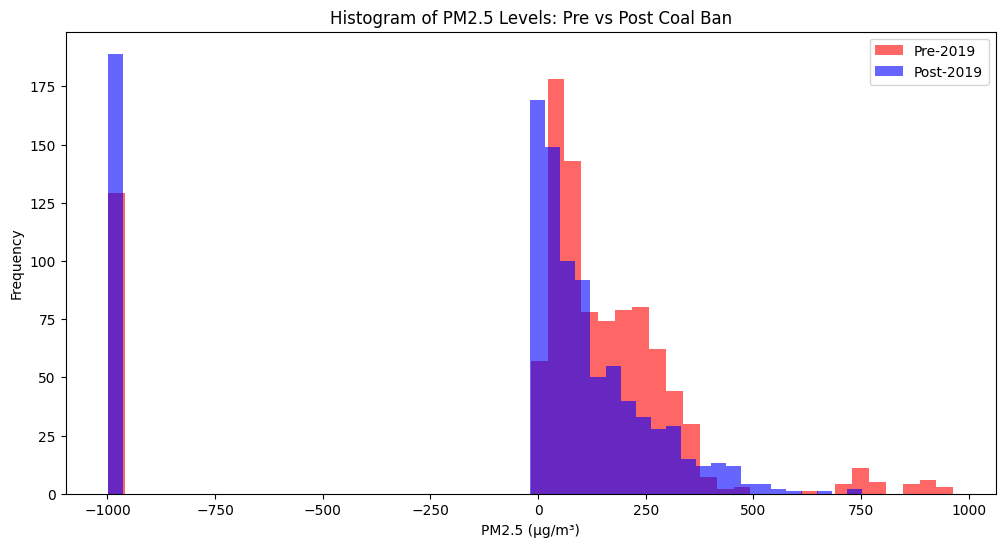

In [25]:
# 2. Histogram
# Select only PM2.5 numeric values
pre_pm25 = pre[pre["parameter"] == "pm25"]["value"].dropna()
post_pm25 = post[post["parameter"] == "pm25"]["value"].dropna()

# Histogram comparison of PM2.5 values
plt.figure(figsize=(12,6))
plt.hist(pre_pm25, bins=50, alpha=0.6, color="red", label="Pre-2019")
plt.hist(post_pm25, bins=50, alpha=0.6, color="blue", label="Post-2019")
plt.xlabel("PM2.5 (µg/m³)")
plt.ylabel("Frequency")
plt.title("Histogram of PM2.5 Levels: Pre vs Post Coal Ban")
plt.legend()
plt.show()


/tmp/ipython-input-933792092.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=pre_pm25["value"], label="Pre-2019", shade=True)
/tmp/ipython-input-933792092.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=post_pm25["value"], label="Post-2019", shade=True)


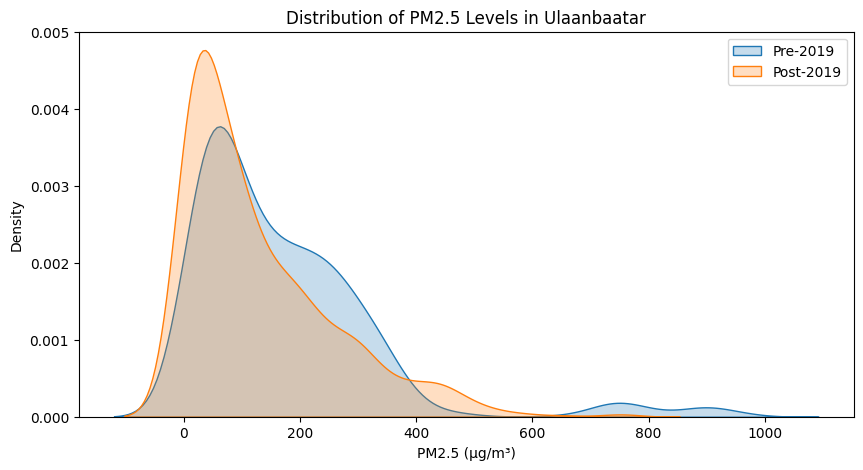

In [15]:
# 3. Distribution plot
plt.figure(figsize=(10,5))
sns.kdeplot(data=pre_pm25["value"], label="Pre-2019", shade=True)
sns.kdeplot(data=post_pm25["value"], label="Post-2019", shade=True)
plt.title("Distribution of PM2.5 Levels in Ulaanbaatar")
plt.xlabel("PM2.5 (µg/m³)")
plt.legend()
plt.show()


/tmp/ipython-input-1161647700.py:2: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df_pm25["month"] = df_pm25["datetimeUtc"].dt.to_period("M")


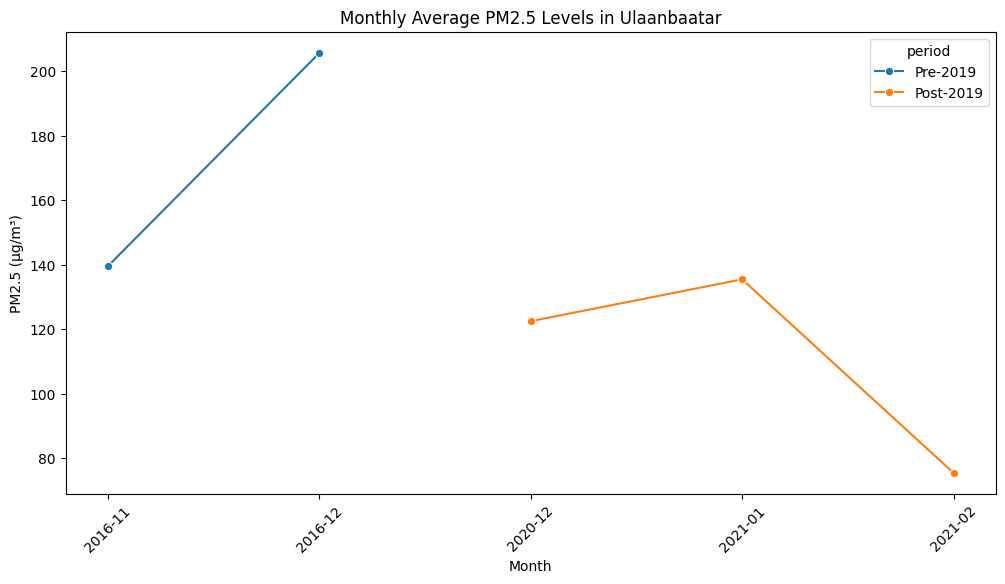

In [16]:
# 3. Time series (monthly average PM2.5)
df_pm25["month"] = df_pm25["datetimeUtc"].dt.to_period("M")
monthly_avg = df_pm25.groupby(["month","period"])["value"].mean().reset_index()
monthly_avg["month"] = monthly_avg["month"].astype(str)

plt.figure(figsize=(12,6))
sns.lineplot(x="month", y="value", hue="period", data=monthly_avg, marker="o")
plt.xticks(rotation=45)
plt.title("Monthly Average PM2.5 Levels in Ulaanbaatar")
plt.ylabel("PM2.5 (µg/m³)")
plt.xlabel("Month")
plt.show()


In [20]:
# Count number of PM2.5 measurements per year
df_pm25["year"] = df_pm25["datetimeUtc"].dt.year
print(df_pm25.groupby(["year", "period"]).size())

year  period              
2016  2015–2018 (Pre-Ban)     1000
2020  2020–2024 (Post-Ban)     277
2021  2020–2024 (Post-Ban)     723
dtype: int64


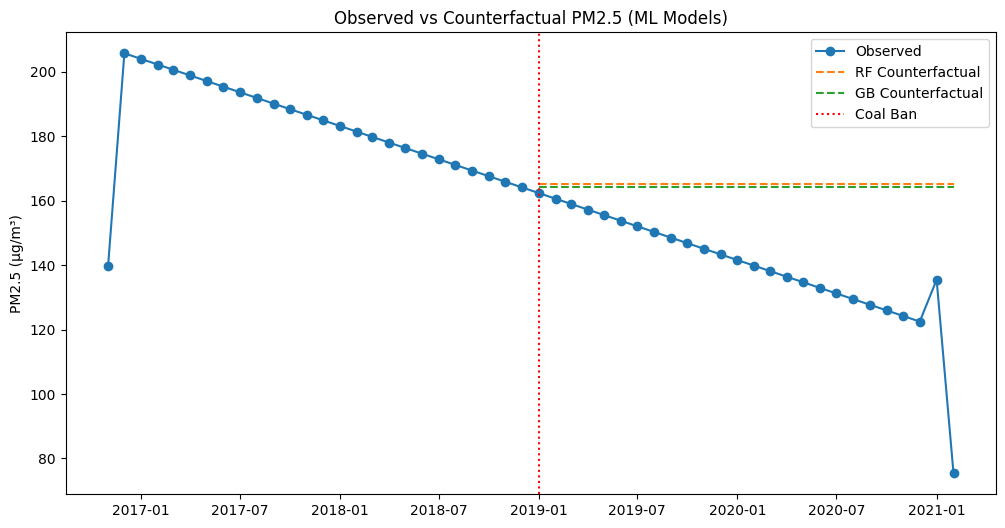

Cumulative impact (Observed - RF Counterfactual): -662.3299590851076
Cumulative impact (Observed - GB Counterfactual): -637.693153230831


In [31]:
# 4. Counterfactual Modeling
# --- Prepare monthly dataset for ML ---
ml_df = monthly.copy().reset_index()  # reset index so datetime becomes a column
ml_df.rename(columns={"month": "month"}, inplace=True)  # ensure column name

# Create a 'post' flag for pre/post policy
policy_date = pd.to_datetime("2019-01-01")
ml_df["post"] = (ml_df["month"] >= policy_date).astype(int)

# Add simple time trend feature
ml_df["time_index"] = np.arange(len(ml_df))

# Split train (pre-policy) and test (post-policy)
train = ml_df[ml_df["post"] == 0].copy()
test = ml_df[ml_df["post"] == 1].copy()

X_train = train[["time_index"]]
y_train = train["value"]

X_test = test[["time_index"]]
y_test = test["value"]

# --- Random Forest ---
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

rf = RandomForestRegressor(n_estimators=500, random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

# --- Gradient Boosting ---
gb = GradientBoostingRegressor(n_estimators=500, learning_rate=0.05, max_depth=3, random_state=42)
gb.fit(X_train, y_train)
gb_pred = gb.predict(X_test)

# --- Store predictions and compute impacts ---
test["rf_counterfactual"] = rf_pred
test["gb_counterfactual"] = gb_pred
test["rf_impact"] = test["value"] - test["rf_counterfactual"]
test["gb_impact"] = test["value"] - test["gb_counterfactual"]

# --- Plot observed vs counterfactual ---
plt.figure(figsize=(12,6))
plt.plot(ml_df["month"], ml_df["value"], label="Observed", marker="o")
plt.plot(test["month"], test["rf_counterfactual"], label="RF Counterfactual", linestyle="--")
plt.plot(test["month"], test["gb_counterfactual"], label="GB Counterfactual", linestyle="--")
plt.axvline(policy_date, color="red", linestyle=":", label="Coal Ban")
plt.title("Observed vs Counterfactual PM2.5 (ML Models)")
plt.ylabel("PM2.5 (µg/m³)")
plt.legend()
plt.show()

# --- Print cumulative impacts ---
print("Cumulative impact (Observed - RF Counterfactual):", test["rf_impact"].sum())
print("Cumulative impact (Observed - GB Counterfactual):", test["gb_impact"].sum())
